<a href="https://colab.research.google.com/github/kirangang/Cognifyz_Technologies/blob/main/Level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Level 3**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Connecting the google colab notebook with the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset to be analysed
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [ ]:
df.shape

(9542, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

#### This is already the cleaned dataset which we have cleaned in the Level 1. So we will directly proceed for the tasks now.

# Task 1

## Task: Restaurant Reviews

###1) Analyze the text reviews to identify the most common positive and negative keywords.

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Create empty lists to store positive and negative words
positive_words = []
negative_words = []

# Analyze each review and extract positive and negative keywords
for review in df['Rating text']:
    tokens = word_tokenize(review.lower())
    sentiment_scores = sia.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.2:
        positive_words.extend(tokens)
    elif sentiment_scores['compound'] <= -0.2:
        negative_words.extend(tokens)

# Calculate the most common positive and negative keywords
common_positive_keywords = Counter(positive_words).most_common(10)
common_negative_keywords = Counter(negative_words).most_common(10)

# Print the results
print("Most Common Positive Keywords:")
print(common_positive_keywords)

print("\nMost Common Negative Keywords:")
print(common_negative_keywords)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Most Common Positive Keywords:
[('good', 3174), ('very', 1078), ('excellent', 300)]

Most Common Negative Keywords:
[('poor', 186)]


###2) Calculate the average length of reviews and explore if there is a relationship between review length and rating.

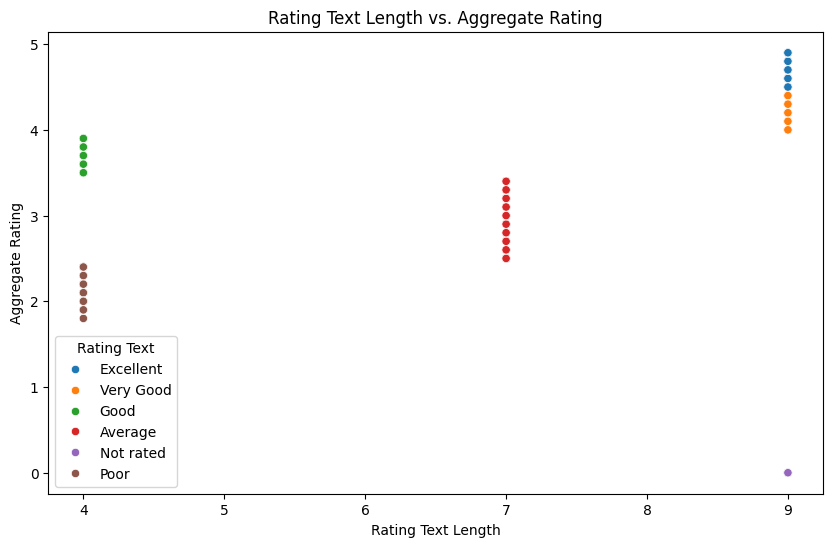

Average Rating Text Length: 7.021588765457976


In [ ]:
# Calculate the length of each 'Rating text'
df['Rating Text Length'] = df['Rating text'].apply(len)

# Calculate the average length of 'Rating text'
average_rating_text_length = df['Rating Text Length'].mean()

# Scatter plot of 'Rating text' length vs. aggregate rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating Text Length', y='Aggregate rating', hue='Rating text')
plt.title('Rating Text Length vs. Aggregate Rating')
plt.xlabel('Rating Text Length')
plt.ylabel('Aggregate Rating')
plt.legend(title='Rating Text')
plt.show()

# Output the average 'Rating text' length
print(f'Average Rating Text Length: {average_rating_text_length}')

# Task 2

## Task: Votes Analysis

###1) Identify the restaurants with the highest and lowest number of votes.

In [ ]:
# Sort the dataset by the number of votes in descending order
sorted_by_votes = df.sort_values(by='Votes', ascending=False)

# Select the top 5 restaurants with the highest number of votes
top_5_highest_votes = sorted_by_votes.head(5)

# Select the top 5 restaurants with the lowest number of votes
top_5_lowest_votes = sorted_by_votes.tail(5)

# Output the results
print("Top 5 restaurants with the highest number of votes:")
print(top_5_highest_votes[['Restaurant Name', 'Votes']])

print("\nTop 5 restaurants with the lowest number of votes:")
print(top_5_lowest_votes[['Restaurant Name', 'Votes']])

Top 5 restaurants with the highest number of votes:
                Restaurant Name  Votes
719                        Toit  10934
726                    Truffles   9667
3985           Hauz Khas Social   7931
2403                  Peter Cat   7574
730   AB's - Absolute Barbecues   6907

Top 5 restaurants with the lowest number of votes:
              Restaurant Name  Votes
8384       Street Food Corner      0
8383   Green Chilli Fast Food      0
2203          Knights Kitchen      0
2204              Ku-Kukdu-Ku      0
6078  Dinesh Ka Mithila Dhaba      0


###2) Analyze if there is a correlation between the number of votes and the rating of a restaurant.

Pearson correlation coefficient between Votes and Aggregate Rating: 0.3134741803250004


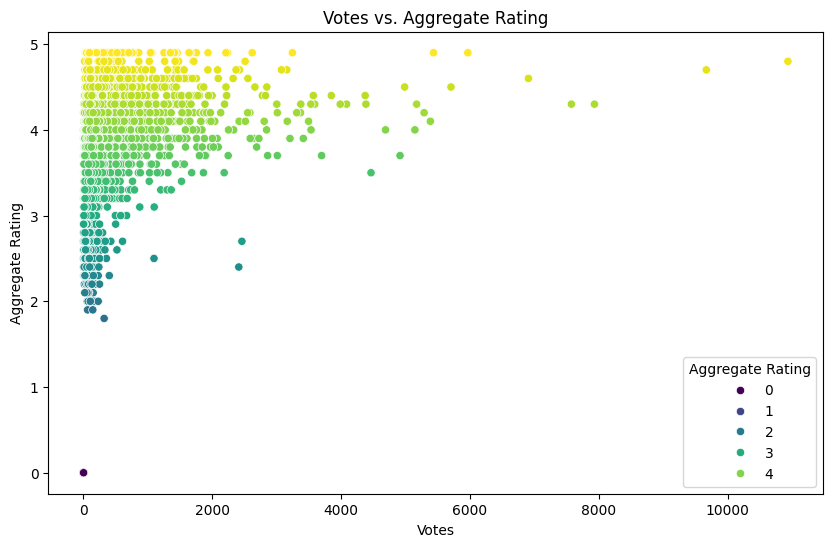

In [ ]:
# Calculate the Pearson correlation coefficient between 'Votes' and 'Aggregate rating'
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f'Pearson correlation coefficient between Votes and Aggregate Rating: {correlation}')

# Scatter plot to visualize the relationship between 'Votes' and 'Aggregate rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', hue='Aggregate rating', palette='viridis')
plt.title('Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.legend(title='Aggregate Rating')
plt.show()

# Task 3

## Task: Price Range vs. Online Delivery and Table Booking

###1) Analyze if there is a relationship between the price range and the availability of online delivery and table booking.


In [ ]:
# Create a contingency table to analyze the relationship
contingency_table = pd.crosstab(index=df['Price range'], columns=[df['Has Online delivery'], df['Has Table booking']], margins=True)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Has Online delivery    No        Yes        All
Has Table booking      No  Yes    No  Yes      
Price range                                    
1                    3737    0   700    1  4438
2                    1711  116  1163  123  3113
3                     621  373   140  271  1405
4                     299  234    13   40   586
All                  6368  723  2016  435  9542


###2) Determine if higher-priced restaurants are more likely to offer these services.

Average Price Range for Restaurants Offering Online Delivery: 1.9249286005711954
Average Price Range for Restaurants Not Offering Online Delivery: 1.76350303201241
Average Price Range for Restaurants Offering Table Booking: 3.028497409326425
Average Price Range for Restaurants Not Offering Table Booking: 1.6359732824427482


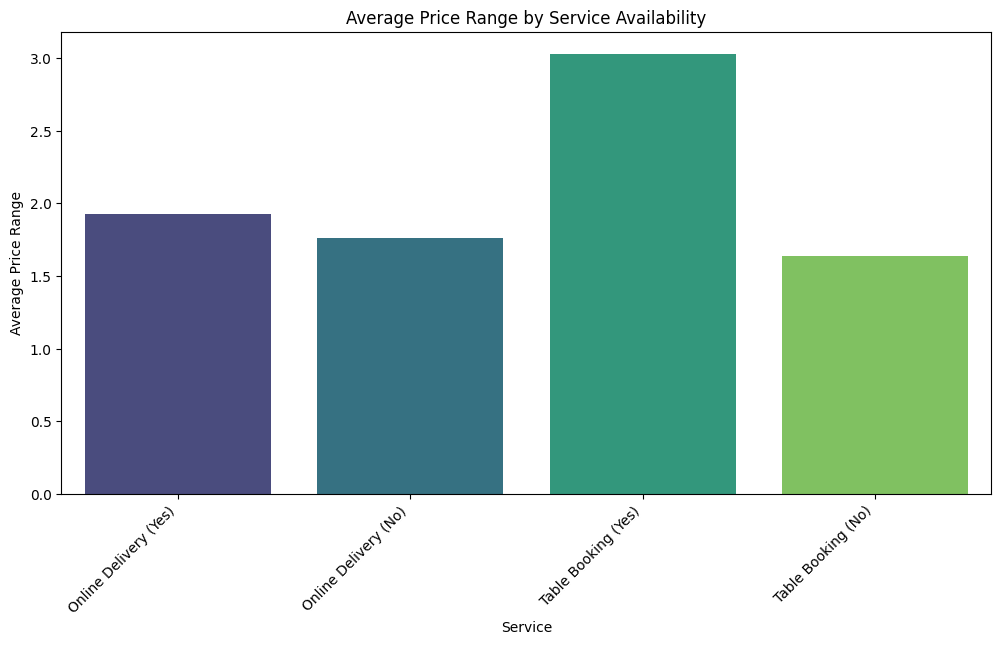

In [ ]:
# Sample data preparation (ensure 'Yes' and 'No' are correctly mapped)
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

# Calculate average price ranges
avg_price_range_with_delivery = df[df['Has Online delivery'] == 1]['Price range'].mean()
avg_price_range_without_delivery = df[df['Has Online delivery'] == 0]['Price range'].mean()

avg_price_range_with_table_booking = df[df['Has Table booking'] == 1]['Price range'].mean()
avg_price_range_without_table_booking = df[df['Has Table booking'] == 0]['Price range'].mean()

print("Average Price Range for Restaurants Offering Online Delivery:", avg_price_range_with_delivery)
print("Average Price Range for Restaurants Not Offering Online Delivery:", avg_price_range_without_delivery)
print("Average Price Range for Restaurants Offering Table Booking:", avg_price_range_with_table_booking)
print("Average Price Range for Restaurants Not Offering Table Booking:", avg_price_range_without_table_booking)

# Prepare data for bar plots
plot_data = pd.DataFrame({
    'Service': ['Online Delivery (Yes)', 'Online Delivery (No)', 'Table Booking (Yes)', 'Table Booking (No)'],
    'Average Price Range': [
        avg_price_range_with_delivery,
        avg_price_range_without_delivery,
        avg_price_range_with_table_booking,
        avg_price_range_without_table_booking
    ]
})

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot
sns.barplot(x='Service', y='Average Price Range', data=plot_data, palette='viridis')

plt.title('Average Price Range by Service Availability')
plt.xlabel('Service')
plt.ylabel('Average Price Range')
plt.xticks(rotation=45, ha='right')
plt.show()
